<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b><i>Copyright 2023 @ Authors</i></b><br/>
        作者：<a style="font-weight:bold" href="mailto:bshan@mail.hust.edu.cn">斯坦福大厨 📨 </a><br>
        日期：2023-11-12<br/>
        <img src="https://github.com/stanfordbshan/CompMatBook/blob/main/author.png?raw=true" width="100"/>
        共享协议：本作品采用<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议</a>进行许可。</i><br/>
    </p>
</div>

恭喜您已经发现了这份神奇的计算材料学课件！这份课件是我在熬夜吃掉不计其数的披萨和咖啡后创作出来的，配套的教材是由单斌、陈征征、陈蓉合著的《计算材料学--从算法原理到代码实现》。学习资料合集您可以在这个网址找到：[www.materialssimulation.com/book](http://www.materialssimulation.com/book)，您也可以跟着up主[无人问津晦涩难懂的B站视频](https://space.bilibili.com/1111135013/channel/collectiondetail?sid=1458375)一起进行学习。希望它能帮您在计算材料学的道路上摔得不那么痛。

就像您尊重那些一边烘焙披萨一边写代码的大厨一样，当您使用这份课件时，请：

- 记得告诉大家这份课件是斯坦福大厨写的，并且他在华中科技大学微纳中心工作
- 别用它去赚大钱，这个课件是用来学习的，不是用来买披萨的
- 保持开放共享的精神




如果你有关于计算材料学的想法，或者你只是想和我讨论最好吃的披萨口味，欢迎通过邮件 bshan@mail.hust.edu.cn 联系我。

# 目录（对应《计算材料学》章节8.2.2）

<a href="https://item.jd.com/10089064828853.html"><img src="https://github.com/stanfordbshan/CompMatBook/blob/main/cover.png?raw=true"  width="200"/></a>
<a href="https://item.jd.com/10089064828853.html">点击购书</a>

* [GTO](#GTObasics)
    * [1. GTO定义](#GTObasics)
    * [2. 交叠积分](#overlap)
    * [3. 随机均匀采样法](#UniformSampling)
    * [4. 重要性采样法](#ImportanceSampling)
* [参考](#references)

<a name="GTObasics"></a>
## 1. 高斯1s轨道

当谈论GTO 1s轨道时，我们指的是高斯型轨道（Gaussian Type Orbitals）中的1s轨道。这种轨道用于量子化学中，特别是在从头计算（ab initio）和密度泛函理论（DFT）中模拟电子行为。1s轨道是最简单的GTO类型，它具有球形对称性，通常用于模拟氢原子或其他单电子系统的最低能量电子态。这种轨道通过高斯函数来近似实际的原子轨道，使得在计算机模拟中的计算更加高效。由于其简单性和高效性，GTO 1s轨道在量子化学计算中广泛应用。

位于$R_a$处的GTO 1s轨道的完整表达式为：

$$
\psi_{1s}(r) = \left( \frac{2\alpha}{\pi} \right)^{3/4} e^{-\alpha r^2}
$$


其中，$\psi_{1s}(\mathbf{r})$ 是1s轨道的波函数，$\mathbf{r-R_a}$ 是从原子核到电子的位置向量，$N$ 是归一化常数，$\alpha$ 是轨道指数，它决定了波函数的宽度。这个指数是调整轨道大小的关键参数，通常在计算化学模拟中经验确定。

In [1]:
import numpy as np

def GTO_1s(r, Ra, alpha):
    """
    Compute the value of the 1s Gaussian-type orbital (GTO) at a given position.

    Parameters:
    r: np.ndarray or float
        Position vector of electron.
    Ra: np.ndarray or float
        Position vector of the nucleus (center of the GTO).
    alpha: float
        Orbital exponent.

    Returns:
    float
        Value of the 1s GTO at the given position.
    """

    # Calculate distance between electron and nucleus
    distance_squared = np.linalg.norm(r - Ra, axis=-1)**2

    # Calculate the normalization constant
    N = (2 * alpha / np.pi)**(3 / 4)

    # Compute the value of the GTO
    value = N * np.exp(-alpha * distance_squared)

    return value

# Test the function
r_test = np.array([0.1, 0.2, 0.9])
Ra_test = np.array([0, 0, 0])
alpha_test = 1.0

GTO_value = GTO_1s(r_test, Ra_test, alpha_test)
GTO_value


0.3015899309146682

我们可视化位于[1,0,0]，宽度为1的GTO 1s轨道

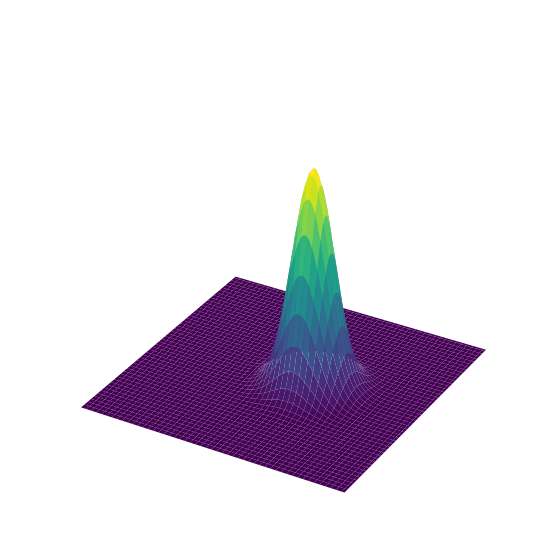

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the center and the exponent
Ra = np.array([1, 0, 0])
alpha = 1  # Adjust this parameter as needed

# Create a grid of (x, y) coordinates
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Reshape X, Y, and Z (0s) into a 3D vector format
R = np.stack((X, Y, np.zeros_like(X)), axis=-1)

# Evaluate the GTO_1s function on the grid
Z = GTO_1s(R, Ra, alpha)

# Create a figure and a 3D axis
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': '3d'})

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Hide the axes
ax.set_axis_off()

# Show the plot
plt.show()


<a name="overlap"></a>
## 2. Gaussian 1s轨道的交叠积分

与Slater基函数不同，两个 1s 高斯轨道（GTOs）之间的重叠积分可以直接通过解析方式计算。

$$
S = \left( \frac{2 \sqrt{\alpha \beta}}{\alpha + \beta} \right)^{3/2} e^{-\frac{\alpha \beta}{\alpha + \beta} |\mathbf{R}_a - \mathbf{R}_b|^2}
$$

这个表达式提供了两个具有不同指数 $ \alpha $ 和 $ \beta $ 的高斯轨道之间的闭合形式解析解，轨道中心分别位于 $ \mathbf{R}_a $ 和 $ \mathbf{R}_b $。指数项 $ e^{-\frac{\alpha \beta}{\alpha + \beta} |\mathbf{R}_a - \mathbf{R}_b|^2} $ 反映了随着两个轨道中心距离增加，重叠程度的减少。


<ipython-input-1-68de749ca9ad>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  distance_squared = np.linalg.norm(r - Ra, axis=-1)**2


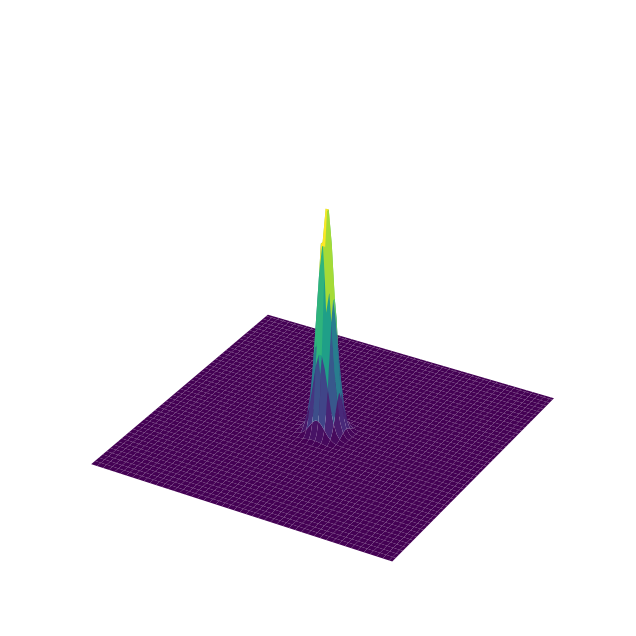

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the integrand as the product of two Gaussian functions
def gaussian_product(alpha, beta, Ra, Rb, x, y):
    G1 = GTO_1s([x,y,0], Ra, alpha)
    G2 = GTO_1s([x,y,0], Rb, beta)
    return G1*G2

# Parameters for the Gaussian Type Orbitals
alpha = 1.0  # Exponent for the first GTO
beta = 1.0   # Exponent for the second GTO
Ra = np.array([0, 0, 0])  # Center of the first GTO
Rb = np.array([0, 0, 1])  # Center of the second GTO

# Create a mesh in the xy-plane
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Calculate the integrand over the mesh
Z = gaussian_product(alpha, beta, Ra, Rb, X, Y)

# Plot the integrand
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Hide the axes
ax.set_zlim(0, 0.2)
ax.set_axis_off()

# Show plot
plt.show()


用解析公式计算全空间的交叠积分

In [ ]:
import numpy as np

def integrand_gaussian_1s_analytical(alpha, beta, Ra, Rb):
    """Calculate the overlap integral for two 1s Gaussian orbitals
    centered at Ra and Rb with the same orbital exponent alpha and beta.
    """
    # Calculate the distance between the two centers
    distance_squared = np.linalg.norm(Ra - Rb)**2

    # Calculate the overlap integral using the analytical formula
    S = ((2*np.sqrt(alpha*beta) / (alpha + beta))**(3 / 2)) * np.exp(-((alpha * beta) / (alpha + beta)) * distance_squared)

    return S

# Test the function
# Test the function
alpha_test = 1.0
beta_test = 1.0
Ra_test = np.array([0, 0, 0])
Rb_test = np.array([0, 0, 1])

overlap_integral = integrand_gaussian_1s_analytical(alpha_test, beta_test, Ra_test, Rb_test)
overlap_integral


0.6065306597126334

我们也可以用数值积分计算在[-100,100]区间内的积分值，它应该略小于积分的理论值

In [ ]:
from scipy.integrate import nquad

def GTO_1s_overlap(x, y, z, alpha, beta, Ra, Rb):
    """
    Calculate the overlap value at (x,y,z) between two 1s Gaussian-type orbitals.

    Parameters:
    x, y, z: float
        Coordinates of the point where the overlap is calculated.
    alpha, beta: float
        Orbital exponents for the two GTOs.
    Ra, Rb: np.ndarray or float
        Position vectors of the nuclei (centers of the GTOs).

    Returns:
    float
        Value of the overlap at the given point.
    """

    # Position vector for the point (x, y, z)
    r = np.array([x, y, z])

    # Calculate distance between point and each nucleus
    G1 = GTO_1s(r, Ra, alpha)
    G2 = GTO_1s(r, Rb, beta)

    return G1*G2

# Test the function
alpha, beta = 1.0, 1.0
Ra = np.array([0, 0, 0])
Rb = np.array([0, 0, 1])

# Calculate the overlap integral
result, error = nquad(GTO_1s_overlap, [[-10, 10], [-10, 10], [-10, 10]], args=(alpha, beta, Ra, Rb))

print('Integration estimate=',result, '',error)


Integration estimate= 0.6065306597126231  1.4883110471475243e-08


## 3. 蒙特卡洛积分--随机均匀采样法

随机均匀采样的蒙特卡洛方法是一种计算函数积分值的强大技术，特别适用于高维积分问题。这种方法的基本思想是通过随机采样来估计积分值。具体来说，这涉及到在积分区域内随机均匀地生成点，并计算这些点处的函数值。

这个过程可以描述如下：

1. **定义积分区域**：首先确定函数的积分区域。对于简单的一维积分，这可能是一个区间；对于多维积分，它可能是更复杂的区域。

2. **随机撒点**：在定义的积分区域内随机生成大量点。这些点应该均匀分布，以确保每个区域都被适当地采样。

3. **计算函数值**：计算每个随机点处的函数值。

4. **估计积分**：积分的估计值是所有点处函数值的平均值，乘以积分区域的总体积。数学上，如果我们撒了 $N$ 个点，那么积分的估计值为：
   $$
   \int f(x) \, dx \approx \frac{\text{区域体积}}{N} \sum_{i=1}^{N} f(x_i)
   $$

   其中 $x_i$ 是随机点，$f(x_i)$ 是在这些点处的函数值。

蒙特卡洛方法的优势在于其简单性和对高维问题的适用性。然而，这种方法的准确性依赖于撒点的数量：点数越多，估计的准确性通常越高。不过，这也意味着计算成本会随着点数的增加而增加。此外，蒙特卡洛方法通常不如传统的数值积分方法（如辛普森法则或梯形法则）精确，但在处理高维问题或非常复杂的积分区域时，它们是非常有用的工具。

In [ ]:
import numpy as np

def GTO_overlap_Monte_Carlo_estimate(alpha, beta, Ra, Rb, num_points=1e8):
    """
    Calculate the overlap integral between two 1s Gaussian Type Orbitals (STOs)
    using Monte Carlo integration.

    Parameters
    ----------
    alpha : float
        Orbital exponent for the first GTO centered at Ra.
    beta : float
        Orbital exponent for the second GTO centered at Rb.
    Ra : array_like
        Position vector of the nucleus for the first GTO, shape (3,).
    Rb : array_like
        Position vector of the nucleus for the second GTO, shape (3,).
    num_points : int, optional
        Number of Monte Carlo points to sample. Default is 1e8.

    Returns
    -------
    float
        The overlap integral between the two STOs.

    Notes
    -----
    This function assumes that the STOs are normalized.

    Examples
    --------
    >>> STO_monte_carlo_overlap(1.0, 1.0, [0, 0, 0], [0, 0, 0])
    Approximately 1 (for same STOs overlap should be 1)
    """

    num_points = int(num_points)

    # Generate random points in a cube surrounding the two centers
    max_dim = 100  # the maximum distance out to which we sample points (cube from -3 to +3 along each axis)
    points = np.random.uniform(-max_dim, max_dim, (num_points, 3))

    # Calculate the volume element based on the cube size
    volume_element = (2 * max_dim)**3 / num_points

    # Evaluate the STO functions at each point
    values_a = np.array([GTO_1s(point, Ra, alpha) for point in points])
    values_b = np.array([GTO_1s(point, Rb, beta) for point in points])

    # Evaluate the integral
    integral_value = np.sum(values_a * values_b) * volume_element

    return integral_value


# Example usage
Ra = np.array([0, 0, 0])
Rb = np.array([0, 0, 1])
alpha = 1.0
beta = 1.0
num_points = 1e6

overlap_value = GTO_overlap_Monte_Carlo_estimate(alpha, beta, Ra, Rb, num_points)
print(f"The Monte Carlo estimate for the overlap integral is: {overlap_value}")

The Monte Carlo estimate for the overlap integral is: 0.11501448066131549


我们观察积分值随着撒点数增加的趋势：在采样样本数小于$10^7$以下时，积分值剧烈震荡不收敛。采样数接近$10^8$时，才逐步趋向于正确值$\sim 0.6065$

Number of points: 10000, Integral estimate: 1.0598165886777427e-25
Number of points: 16237, Integral estimate: 4.407025714453014e-12
Number of points: 26366, Integral estimate: 1.3344100327848614
Number of points: 42813, Integral estimate: 2.0337551144614267e-11
Number of points: 69519, Integral estimate: 2.3105522480840735e-06
Number of points: 112883, Integral estimate: 7.860875415266077e-05
Number of points: 183298, Integral estimate: 1.3396801696605745
Number of points: 297635, Integral estimate: 0.09668925028998615
Number of points: 483293, Integral estimate: 0.22252388256437075
Number of points: 784759, Integral estimate: 0.0015352027125480866
Number of points: 1274274, Integral estimate: 0.6438809192116858
Number of points: 2069138, Integral estimate: 0.43651904711210854
Number of points: 3359818, Integral estimate: 0.5741829417077285
Number of points: 5455594, Integral estimate: 0.39933513777064605
Number of points: 8858667, Integral estimate: 0.8944911938650909
Number of point

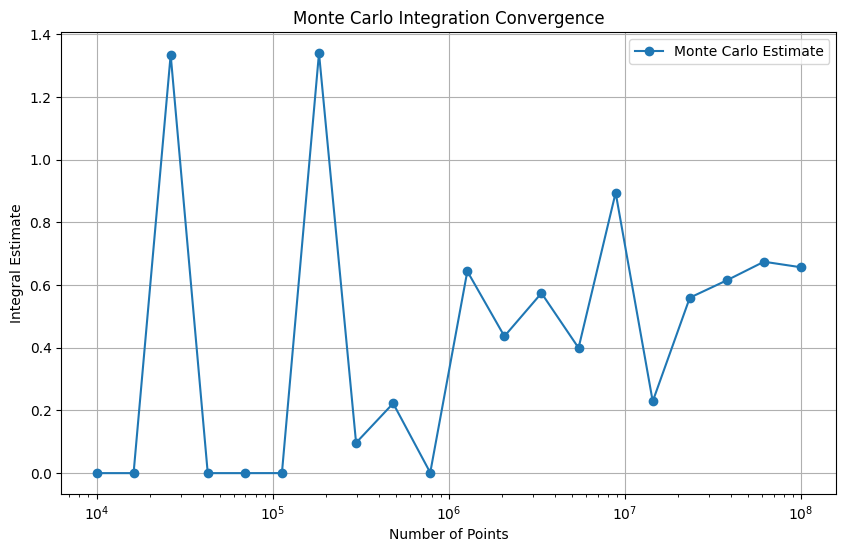

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume GTO_overlap is a previously defined function
# that calculates the overlap integral.

# Parameters for the Gaussian Type Orbitals
alpha = 1.0  # Parameter for the first GTO
beta = 1.0   # Parameter for the second GTO
Ra = np.array([0, 0, 0])  # Position of the first GTO
Rb = np.array([1, 0, 0])  # Position of the second GTO

# Define the range of number of points for which we want to estimate the integral
points_range = np.geomspace(1e4, 1e8, num=20).astype(int)  # Geometric spacing for better distribution

# Store the results
results = []

# Loop over the number of points
for num_points in points_range:
    result = GTO_overlap_Monte_Carlo_estimate(alpha, beta, Ra, Rb, num_points)
    results.append(result)
    print(f"Number of points: {num_points}, Integral estimate: {result}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(points_range, results, '-o', label='Monte Carlo Estimate')
plt.xscale('log')
plt.xlabel('Number of Points')
plt.ylabel('Integral Estimate')
plt.title('Monte Carlo Integration Convergence')
plt.legend()
plt.grid(True)
plt.show()


## 4. 重要性采样思想和公式

蒙特卡洛重要性采样是一种高效的数值积分方法，特别适用于当被积函数具有明显的不均匀性或在特定区域内值较大时。这种方法通过优先采样函数值较大的区域来提高积分的估计精度，从而比传统的随机均匀撒点蒙特卡洛方法更有效。

重要性采样的基本步骤如下：

1. **选择概率密度函数**：首先选择一个与被积函数形状尽可能接近的概率密度函数（PDF），这个PDF定义了如何选择采样点。这意味着在被积函数值较大的区域中采样点会更密集。

2. **生成采样点**：根据所选的PDF在积分区域内生成随机点。这些点不是均匀分布的，而是按照PDF的概率分布来分布。

3. **调整权重**：由于采样点不是均匀分布的，需要对每个点处的函数值进行加权，以补偿采样概率的差异。权重通常是被积函数值与PDF值的比率。

4. **估计积分**：计算加权后的函数值的平均值，乘以积分区域的总体积，即可得到积分的估计值。数学上表示为：
   $$
   \int f(x) \, dx \approx \frac{\text{区域体积}}{N} \sum_{i=1}^{N} \frac{f(x_i)}{p(x_i)}
   $$

   其中，$x_i$ 是采样点，$f(x_i)$ 是这些点处的函数值，$p(x_i)$ 是在点 $x_i$ 处的PDF值。

重要性采样的主要优势在于其可以提高计算效率，尤其是对于具有显著特征或“热点”的函数。通过更频繁地采样这些区域，可以减少计算中的方差，从而提高估计的精度。不过，选择合适的PDF对于方法的成功至关重要；一个不佳的PDF选择可能导致效率低下甚至错误的结果。在实际应用中，找到一个好的PDF可能需要专业知识或实验调整。

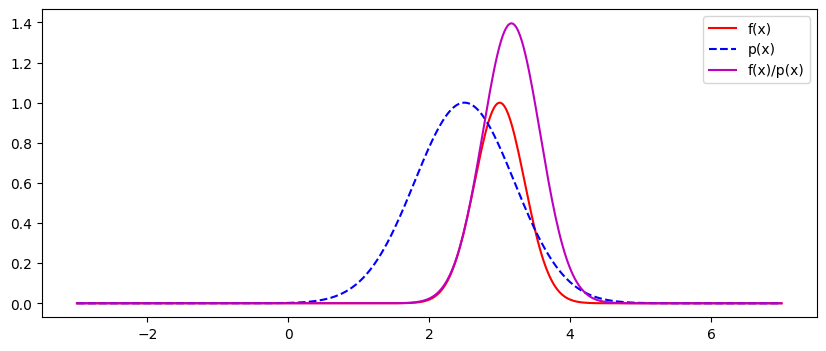

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# This function is a placeholder and should be replaced with the actual mathematical representation of f(x)
def f(x):
    return np.exp(-4*(x-3)**2)

# This function is a placeholder and should be replaced with the actual mathematical representation of p(x)
def p(x):
    return np.exp(-(x-2.5)**2)

# Define the x range
x = np.linspace(-3, 7, 400)

# Calculate the functions
fx = f(x)
px = p(x)

# Calculate the ratio of f(x) and p(x)
ratio = fx / px

# Create the plot
plt.figure(figsize=(10, 4))

# Plot each function
plt.plot(x, fx, 'r-', label='f(x)')
plt.plot(x, px, 'b--', label='p(x)')

# Plot the ratio with a solid purple line
plt.plot(x, ratio, 'm-', label='f(x)/p(x)')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## 5. 重要性采样法计算高斯交叠积分

假设我们的撒点满足三维空间中的高斯分布：

$$
f(x, y, z) = \frac{1}{(2\pi\sigma^2)^{3/2}} \exp\left(-\frac{(x - \mu_x)^2 + (y - \mu_y)^2 + (z - \mu_z)^2}{2\sigma^2}\right)
$$

对于位于[0,0,0]的高斯函数
$$\sigma_A =\sqrt{\frac{1}{2\alpha}}$$

对于位于[1,0,0]的高斯函数
$$\sigma_B =\sqrt{\frac{1}{2\beta}}$$

所以我们可以估算用两者的平均值来作为高斯近似撒点的标准差$\sigma$

$$
\sigma \approx \frac{1}{2}(\sigma_A+\sigma_B)
$$

In [4]:
def importance_sampling_overlap(alpha, beta, Ra, Rb, num_points=1e6):
    num_points = int(num_points)

    # Choose a center for the Gaussian sampling distribution
    center = (Ra + Rb) / 2

    # Choose a standard deviation for the Gaussian
    sigma = 0.5*(np.sqrt(1/(2*alpha))+np.sqrt(1/(2*beta)))

    # Generate random points using Gaussian sampling
    points = np.random.normal(loc=center, scale=sigma, size=(num_points, 3))

    # Evaluate the STO functions at each point
    values_a = np.array([GTO_1s(point, Ra, alpha) for point in points])
    values_b = np.array([GTO_1s(point, Rb, beta) for point in points])

    # Calculate the PDF of the Gaussian at each point
    gaussian_pdf = 1 / ((2 * np.pi * sigma**2)**(3/2)) * np.exp(-np.sum((points - center)**2, axis=1) / (2 * sigma**2))

    # Evaluate the integral using importance sampling
    integral_value = np.sum(values_a * values_b / gaussian_pdf) / num_points

    return integral_value

# Example usage
Ra = np.array([0, 0, 0])
Rb = np.array([0, 0, 1])
zeta_a = 1.0
zeta_b = 1.0
num_points = 1e4

overlap_value = importance_sampling_overlap(zeta_a, zeta_b, Ra, Rb, num_points)
print(f"The importance sampling Monte Carlo estimate for the overlap integral is: {overlap_value}")

The importance sampling Monte Carlo estimate for the overlap integral is: 0.6003977143616623


Number of points: 10000, Integral estimate: 0.6000209199611368
Number of points: 16237, Integral estimate: 0.6143514525735627
Number of points: 26366, Integral estimate: 0.6131625984965879
Number of points: 42813, Integral estimate: 0.6078315633483491
Number of points: 69519, Integral estimate: 0.608536771727821
Number of points: 112883, Integral estimate: 0.6080245708027422
Number of points: 183298, Integral estimate: 0.6045284439159138
Number of points: 297635, Integral estimate: 0.6048386587763008
Number of points: 483293, Integral estimate: 0.6064303836023046
Number of points: 784759, Integral estimate: 0.6071771378741695
Number of points: 1274274, Integral estimate: 0.60616433260128
Number of points: 2069138, Integral estimate: 0.607038122804158
Number of points: 3359818, Integral estimate: 0.6067226268893745
Number of points: 5455594, Integral estimate: 0.6062571400696071
Number of points: 8858667, Integral estimate: 0.6066226655696912
Number of points: 14384498, Integral estimat

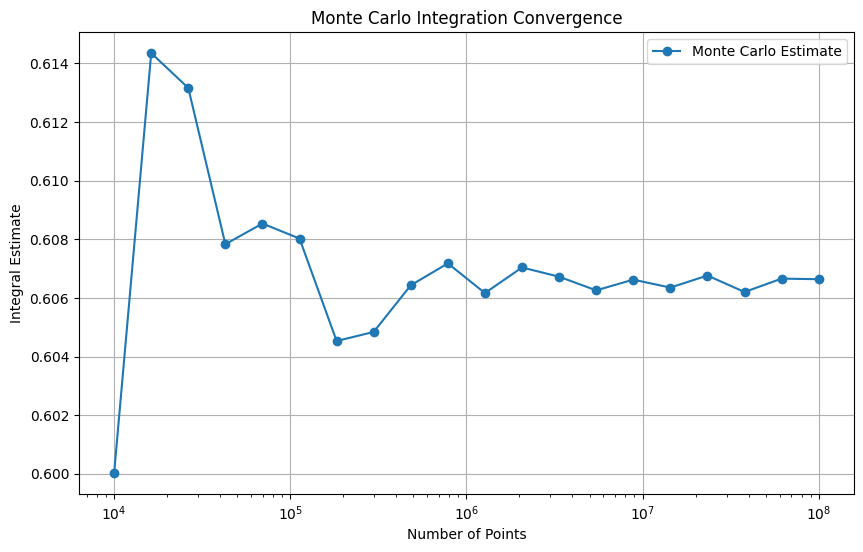

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume GTO_overlap is a previously defined function
# that calculates the overlap integral.

# Parameters for the Gaussian Type Orbitals
alpha = 1.0  # Parameter for the first GTO
beta = 1.0   # Parameter for the second GTO
Ra = np.array([0, 0, 0])  # Position of the first GTO
Rb = np.array([1, 0, 0])  # Position of the second GTO

# Define the range of number of points for which we want to estimate the integral
points_range = np.geomspace(1e4, 1e8, num=20).astype(int)  # Geometric spacing for better distribution

# Store the results
results = []

# Loop over the number of points
for num_points in points_range:
    result = importance_sampling_overlap(alpha, beta, Ra, Rb, num_points)
    results.append(result)
    print(f"Number of points: {num_points}, Integral estimate: {result}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(points_range, results, '-o', label='Monte Carlo Estimate')
plt.xscale('log')
plt.xlabel('Number of Points')
plt.ylabel('Integral Estimate')
plt.title('Monte Carlo Integration Convergence')
plt.legend()
plt.grid(True)
plt.show()


两种撒点方法计算结果对比图

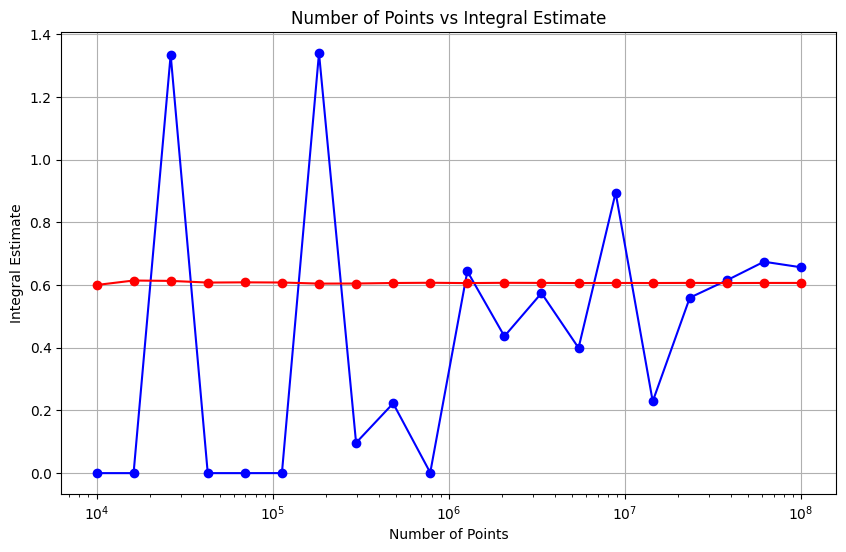

In [9]:
import matplotlib.pyplot as plt

# Data: Number of points and Integral estimates
points1 = [10000, 16237, 26366, 42813, 69519, 112883, 183298, 297635, 483293, 784759,
          1274274, 2069138, 3359818, 5455594, 8858667, 14384498, 23357214, 37926901,
          61584821, 100000000]
estimates1 = [1.0598165886777427e-25, 4.407025714453014e-12, 1.3344100327848614,
             2.0337551144614267e-11, 2.3105522480840735e-06, 7.860875415266077e-05,
             1.3396801696605745, 0.09668925028998615, 0.22252388256437075,
             0.0015352027125480866, 0.6438809192116858, 0.43651904711210854,
             0.5741829417077285, 0.39933513777064605, 0.8944911938650909,
             0.2288121753696821, 0.5595758694258866, 0.6150996559817599,
             0.674324486177902, 0.6565419140491576]
# Second data set: Number of points and Integral estimates
points2 = [10000, 16237, 26366, 42813, 69519, 112883, 183298, 297635, 483293, 784759,
           1274274, 2069138, 3359818, 5455594, 8858667, 14384498, 23357214, 37926901,
           61584821, 100000000]
estimates2 = [0.6000209199611368, 0.6143514525735627, 0.6131625984965879, 0.6078315633483491,
              0.608536771727821, 0.6080245708027422, 0.6045284439159138, 0.6048386587763008,
              0.6064303836023046, 0.6071771378741695, 0.60616433260128, 0.607038122804158,
              0.6067226268893745, 0.6062571400696071, 0.6066226655696912, 0.6063516500945323,
              0.6067628805903189, 0.6062011855785572, 0.6066564249592433, 0.6066376906819004]

# Creating the plot with two data sets
plt.figure(figsize=(10, 6))
plt.plot(points1, estimates1, marker='o', linestyle='-', color='b', label='Uniform Sampling')
plt.plot(points2, estimates2, marker='o', linestyle='-', color='r', label='Importance Sampling')
plt.xscale('log')  # Setting x-axis to logarithmic scale due to wide range of values
plt.xlabel('Number of Points')
plt.ylabel('Integral Estimate')
plt.title('Number of Points vs Integral Estimate')
plt.grid(True)
plt.show()



### 优点：

1. **方差减少**：当重要性采样分布与被积分函数的形状，特别是在峰值附近相匹配时，它能显著减少估计的方差，导致更快的收敛速度。

2. **罕见事件模拟**：它对于模拟罕见事件特别有用。通过选择一个过度采样罕见事件的分布，它能更准确地估计这些事件的概率。

3. **效率**：由于样本从对积分或期望值贡献大的区域抽取，这种方法能更有效地利用样本。

4. **灵活性**：该方法在选择提议分布方面具有很大的灵活性，可以针对具体问题进行定制。

### 缺点：

1. **分布选择**：最大的挑战是选择合适的重要性采样分布。不当的选择可能会增加方差，甚至比简单随机抽样的结果还要糟糕。

2. **增加复杂性**：它在模拟过程中引入了额外的复杂性，因为它需要选择和实现一个替代分布。

3. **样本偏差**：如果实现不正确，该方法可能会在估计过程中引入偏差。

4. **高维度困难**：在高维空间中，找到一个能提高效率的合适的重要性采样分布可能非常困难。

<a name="references"></a>
## 参考资料

- [本章节B站配套视频](https://www.bilibili.com/video/BV1hC4y1n7kD/)
- [Importance Sampling - VISUALLY EXPLAINED with EXAMPLES!](https://www.youtube.com/watch?v=ivBtpzHcvpg)